# **Query SQL**

In [1]:
from google.colab import auth
from google.cloud import bigquery
auth.authenticate_user()
print('Authenticated')

project_id_akun = "amri-h8"
client = bigquery.Client(project=project_id_akun)

Authenticated


Insight : Melakukan `autentikasi` akun `project` pada `bigquery` menggunakan library google `colab` dan `cloud`.

## Query Loading

In [2]:
query = """
SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_029_rmt.credit-card-information`;
"""
query_job = client.query(query).to_dataframe()
query_job

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125000,200.00,0.00,200.00,0.000000,0.125000,0.000000,0.125000,0.000000,0,2,1200.0,0.000000,NaN,0.000000,8
1,1902,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8
2,2322,1.979916,0.125000,80.00,80.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,0.000000,NaN,0.000000,8
3,3091,3.833185,0.125000,45.00,45.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,500.0,0.000000,NaN,0.000000,8
4,3426,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
8946,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
8947,1995,3447.674222,1.000000,205.00,205.00,0.00,4548.057776,0.090909,0.090909,0.000000,0.545455,7,1,10500.0,665.239171,817.844662,0.000000,11
8948,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11


Insight : Membuat `dataframe` dari dataset yang diambil menggunakan query `SELECT` dan `FROM` lalu diubah menjadi `dataframe` dengan fungsi `to_dataframe`. 

## CUST ID GANJIL

### -Checking Datatype

In [22]:
query = """
SELECT COLUMN_NAME, DATA_TYPE
FROM `ftds-hacktiv8-project.phase1_ftds_029_rmt.INFORMATION_SCHEMA.COLUMNS`
WHERE TABLE_NAME = 'credit-card-information' AND COLUMN_NAME = 'CUST_ID';
"""
query_job = client.query(query).to_dataframe()
query_job

,COLUMN_NAME,DATA_TYPE
0,CUST_ID,INT64


Insight : Mengecek `tipe data` pada `CUST_ID` menggunakan query `WHERE` dengan memanfaatkan query `INFORMATION_SCHEMA.COLUMNS`. 

### -Create New Dataframe

In [23]:
query = """
SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_029_rmt.credit-card-information`
WHERE MOD(CUST_ID, 2) <> 0;
"""
query_new = client.query(query).to_dataframe()
query_new

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,NaN,0.0,8
2,6075,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8
4,7755,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,2345,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11
4471,6785,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11
4472,7347,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
4473,8447,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11


Insight : Membuat `dataframe` baru yang berisi `CUST_ID` `ganjil` saja dengan menggunakan query `MOD`.

## Create CSV File

In [24]:
query_new.to_csv('P1G6_Set_1_amri-hakim.csv', index=False)

Insight : Membuat `file CSV` yang berisi `dataframe` yang sebelumnya sudah dideklarasikan oleh variabel `query_new` dengan menggunakan fungsi `to_csv`.

# **Import Libraries**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

import pickle as pkl
import warnings
warnings.filterwarnings('ignore')

Insight : Melakukan `import` pada `library-library` yang dibutuhkan untuk `pemodelan` data `unsupervised learning`.

# **Data Loading**

## Load Data

In [43]:
df = pd.read_csv("P1G6_Set_1_amri-hakim.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,NaN,0.0,8
2,6075,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8
4,7755,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,2345,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11
4471,6785,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11
4472,7347,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
4473,8447,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11


Insight : Melakukan `load data` dari hasil `CSV` yang telah dibuat sebelumnya dengan menggunakan fungsi `pd.read_csv`.

## Duplicates Handling

In [44]:
duplicates_count = df.duplicated().sum()
duplicates_count

0

Insight : Mengecek `duplikasi` data terlebih dahulu `sebelum` dilakukan `EDA` (Exploratary Data Analysis) dan `pemodelan` data menggunakan fungsi `duplicated` dibarengi dengan `sum` untuk `menjumlahkan` total `duplikasinya`. Pada hasil, `duplikasi` data adalah 0 alias `tidak ada`. Jadi, `tidak` perlu dilakukan duplicates `handling`.  

# **Exploratory Data Analysis (EDA)**

In [45]:
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125000,45.00,45.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,500.0,0.000000,NaN,0.000000,8
1,5069,0.000000,0.000000,176.03,176.03,0.00,0.0,0.125,0.125,0.00,0.0,0,1,7000.0,0.000000,NaN,0.000000,8
2,6075,757.964752,0.875000,157.40,157.40,0.00,0.0,0.125,0.125,0.00,0.0,0,6,1200.0,1494.480376,2638.598410,0.000000,8
3,6291,264.566591,0.375000,1150.00,1150.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1200.0,3029.380326,85.428885,0.000000,8
4,7755,440.613643,1.000000,600.00,600.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1000.0,215.316424,137.846006,0.000000,8
5,8299,611.561026,1.000000,765.00,765.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,2000.0,204.464151,146.352314,0.000000,8
6,8629,0.228572,0.125000,60.00,60.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1500.0,438.738982,NaN,0.000000,8
7,8805,105.333584,0.375000,306.00,306.00,0.00,0.0,0.125,0.125,0.00,0.0,0,2,6000.0,101.986927,118.324082,0.000000,8
8,7,16.379412,0.454545,178.15,0.00,178.15,0.0,0.250,0.000,0.25,0.0,0,3,5000.0,229.376368,89.613822,0.181818,12
9,91,559.151424,1.000000,94.00,94.00,0.00,0.0,0.250,0.250,0.00,0.0,0,3,5500.0,254.733329,218.279194,0.000000,12


Insight : Menampilkan `10 data teratas` menggunakan fungsi `head(10)`.

In [46]:
df.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,6809,4438.521324,1.000000,591.84,109.16,482.68,564.365429,0.636364,0.181818,0.454545,0.272727,3,11,17000.0,5552.601399,1094.486286,0.00,11
4466,7211,1135.703750,1.000000,92.07,0.00,92.07,81.509491,0.272727,0.000000,0.181818,0.272727,3,3,1200.0,355.798199,434.689529,0.00,11
4467,8295,185.984965,0.454545,482.24,392.24,90.00,903.843591,0.272727,0.181818,0.090909,0.272727,8,8,1200.0,2333.997439,160.900585,0.25,11
4468,8855,3531.167073,0.900000,797.50,577.83,219.67,5273.226918,0.700000,0.400000,0.500000,0.900000,33,21,4000.0,2979.546700,3052.080103,0.00,10
4469,2389,1917.895730,1.000000,285.07,285.07,0.00,6084.858872,0.363636,0.363636,0.000000,1.090909,28,6,3000.0,5692.682993,556.449635,0.00,11
4470,2345,9629.808851,1.000000,0.00,0.00,0.00,4372.393835,0.000000,0.000000,0.000000,0.545455,9,0,12000.0,2468.988022,2134.295731,0.00,11
4471,6785,1040.030221,1.000000,0.00,0.00,0.00,1390.648290,0.000000,0.000000,0.000000,0.545455,18,0,1400.0,290.129620,287.994171,0.00,11
4472,7347,1322.818587,1.000000,0.00,0.00,0.00,762.301096,0.000000,0.000000,0.000000,0.545455,11,0,1500.0,1035.627320,312.835530,0.00,11
4473,8447,1060.391273,1.000000,0.00,0.00,0.00,1475.858013,0.000000,0.000000,0.000000,0.545455,10,0,2000.0,407.360560,277.084736,0.00,11
4474,1995,3447.674222,1.000000,205.00,205.00,0.00,4548.057776,0.090909,0.090909,0.000000,0.545455,7,1,10500.0,665.239171,817.844662,0.00,11


Insight : Menampilkan `10 data terbawah` atau terakhir menggunakan fungsi `tail(10)`.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

Insight : Mengecek `seluruh informasi` pada `dataframe` menggunakan fungsi `info`. Pada hasil, terlihat bahwa `seluruh kolom` merupakan `numerikal`.

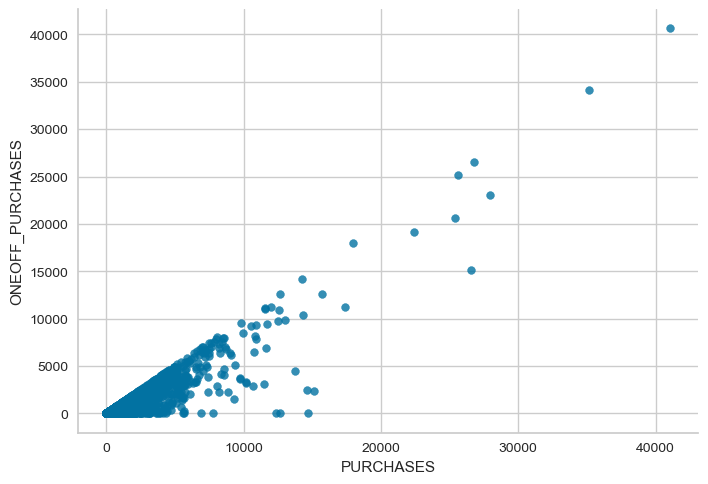

In [48]:
# PURCHASES vs ONEOFF_PURCHASES

df.plot(kind='scatter', x='PURCHASES', y='ONEOFF_PURCHASES', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Insight : Membuat grafik `scatter` menggunakan libarary `matplotlib` untuk melihat `korelasi` antara kedua variabel yaitu `PURCHASES` dan `ONEOFF_PURCHASES`. Pada grafik, terlihat bahwa `kedua variabel` memiliki `korelasi` signifikan yang mana ketika `PURCHASES` `naik`, `ONEOFF_PURCHASES` juga ikut `menaik`.

# **Feature Engineering**

## Drop CUST_ID

In [49]:
df_new = df.drop('CUST_ID', axis=1)
df_new

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,NaN,0.0,8
1,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,NaN,0.0,8
2,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8
4,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11
4471,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11
4472,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
4473,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11


Insight : Menghapus kolom `CUST_ID` menggunakan fungsi `drop` untuk selanjutnya dilakukan pemodelan data. `Penghapusan` kolom tersebut dikarenakan `CUST_ID` tidak terlalu dibutuhkan pada saat pemodelan `unsupervised learning`, sejatinya di hanya `ID` saja yang `tidak` dapat `dimodelkan`.

## Missing Values Handling

### -Check the NaN Values

In [50]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Insight : Mengecek `missing values` menggunakan fungsi `isna` beserta `sum` untuk `menjumlahkan` hasil isna tersebut. Pada hasil, terlihat bahwa kolom `MINIMUM_PAYMENTS` mempunyai value yang hilang sebanyak `155` values. Untuk itu, diperlukan `handling missing values` pada kolom `MINIMUM_PAYMENTS` agar kedepannya data dapat dimodelkan.

### -Check the Skewness of Missing Values on Column

In [51]:
df['MINIMUM_PAYMENTS'].skew()

14.669771084332645

Insight : Mengecek terlebih dahulu nilai `skewness` pada kolom `MINIMUM_PAYMENTS`. Hasilnya adalah cukup `tinggi` untuk `skewness` nya yaitu lebih dari `14` dan juga ekor memanjang ke kanan. Karena cukup `ekstrem`, maka dicek terlebih `outlier` pada kolom tersebut menggunakan teknik `Tukey's Rule`.

### -Using Tukey's Rule for Searching the Outliers

In [52]:
q1 = df['MINIMUM_PAYMENTS'].quantile(0.25)
q3 = df['MINIMUM_PAYMENTS'].quantile(0.75)
iqr = q3 - q1

up_bound = q3 + 1.5 * iqr
low_bound = q1 - 1.5 * iqr

outliers_mp = ((df['MINIMUM_PAYMENTS'] < low_bound) | (df['MINIMUM_PAYMENTS'] > up_bound)).sum()
outliers_mp

441

Insight : Pada pengecekan `outlier`, terdapat `441` values yang berada di area outlier pada kolom MINIMUM_PAYMENTS. Pada `Tukey's Rule`, dilakukan perhitungan `interquartil` terlebih dahulu untuk menentukan batas `atas` dan `bawah` pada data. Dikarenakan `outlier` cukup banyak, maka `missing values` dapat diisi dengan nilai `median` agar data lebih stabil atau `normal`.

### -Fill the NaN Values

In [53]:
df_new['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

Insight : Value yang kosong pada kolom `MINIMUM_PAYMENTS`, diisi dengan nilai `median` menggunakan fungsi `fillna.median`.

## Dimensionality Reduction

### -Scaling

In [54]:
# Feature scaling
scaler = StandardScaler()
df_new_scaled = scaler.fit_transform(df_new)

# Dimensionality Reduction using PCA
pca = PCA()
pca.fit(df_new_scaled)

PCA()

Insight : Melakukan `scaling` pada dataframe menggunakan `StandarScaler`, dan juga `mendefinisikan` serta `training` PCA menggunakan library `PCA` yang di-`fit`-kan.

### -Plot the Explained Variance Ratio and Eigenvalues

Text(0, 0.5, 'Eigenvalues')

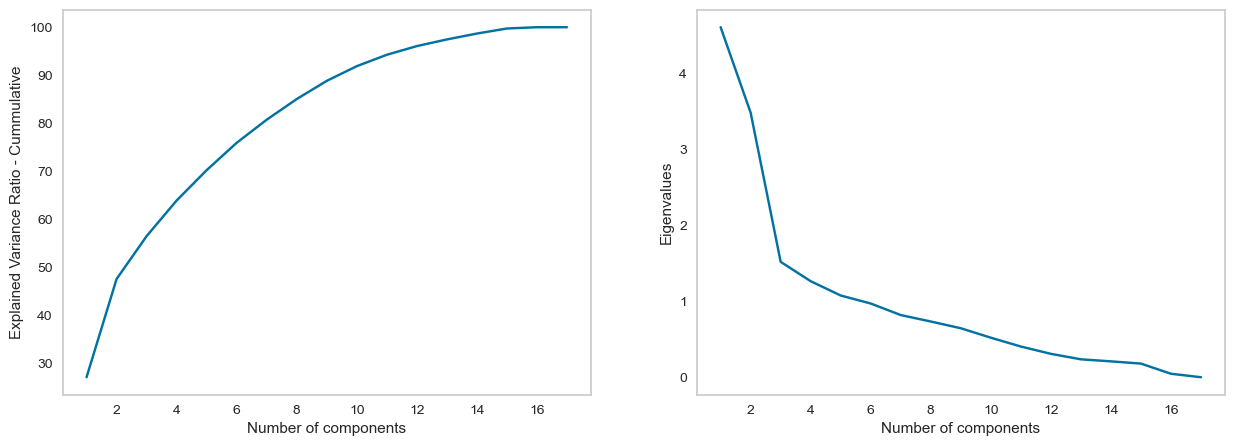

In [55]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 18), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 18), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

Insight : Digunakan `matplotlib` untuk membuat grafik `subplot`. Kemudian digunakan juga `numpy` `cumsum` yang melakukan fungsi `explained_variance_ratio_` agar mengeluarkan nilai `Explained Variance Ratio-Cummulative` dan juga melakukan fungsi `explained_variance_` untuk menampilkan `Eigenvalues`. Keduanya, disandingkan dengan `Number of Components` untuk menghitung `komponen` yang nantinya akan diambil ketika pergerakan `inersia` pada grafik sudah rendah alias `tidak tajam`. Pada `grafik`, terlihat bahwa komponen yang memiliki `Explained Variance Ratio` yang stabil adalah pada kisaran `60-70%`. Saya akan ambil pada `65%`. Dan pada `Eigenvalues`, yang mengalami perubahan signifikan ada pada `3 komponen`. Maka, saya akan ambil angka 3 sebagai komponennya.

### -Number of Features

In [56]:
# Check the number of features if we want to retain 65 % of the information

cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.65) + 1
num_features

5

Insight : Dilakukan `pengecekan` pada fitur yang telah dilakukan `reduksi` dan diambil `65%` dari `keseluruhan value` pada fitur-fitur menggunakan fungsi `numpy` `cumsum` untuk menghitung `jumlah kumulatif` dan `argmax` untuk mencari `indeks terbesar` pada `array`. Dari `17` fitur, tersisa hanya `5` saja yang akan dilakukan training lebih lanjut. 5 di sini adalah fitur yang `mewakili` seluruh `fitur` yang ada pada `dataframe`.

### -Train

In [57]:
# Let's train the model with 65 % of the original dataset information

pca = PCA(n_components=0.65)
pca.fit(df_new_scaled)

df_new_scaled_pca = pca.transform(df_new_scaled)

Insight : Melakukan `training` pada `PCA` dengan `Explained Variance Ratio-Cummulative` yang tadi sudah diasumsikan stabil yaitu `65%` yang mana hasil komponennya adalah `5`. Digunakan fungsi `fit` untuk melakukan `training`.

## Find the Optimal Number of Clusters

### -Using Elbow Method

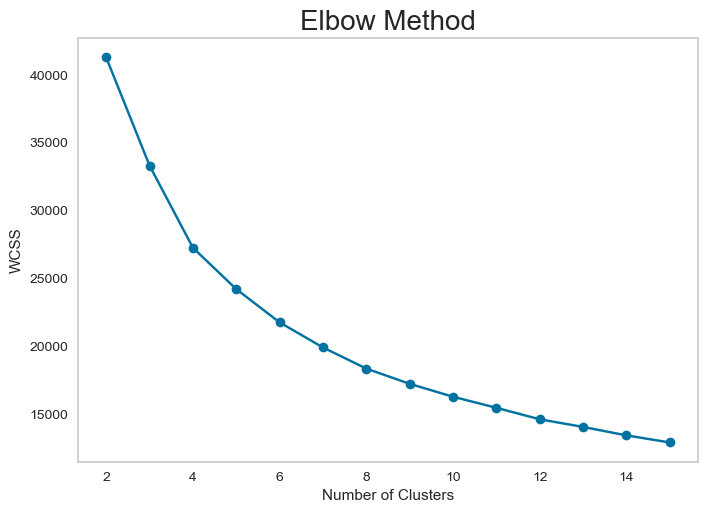

In [58]:
# Find the optimal number of clusters using Elbow Method

wcss = []
random_state = 10
max_cluster = 15
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(df_new_scaled_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Insight : Pada `elbow` method, menganalisis metrik `WCSS` atau `inertia` mana yang terlihat mulai `rendah`. Di grafik, cluster `2 dan 3` masih memiliki nilai inertia yang `tinggi`. Pada `cluster 4`, sudah mulai mengalami perubahan nilai `inertia` yang `rendah`. Itu artinya, `cluster 4` dapat dijadikan rujukan `cluster` terbaik atau `terpadat` pada algoritma `K-Means`. Elbow method ini dihitung menggunakan perulangan `for` dengan `K-Means` yang memiliki `parameter` tertentu. Setelah itu, K-Means dilakukan fitting dan menghasilkan `penambahan inertia` menggunakan fungsi `append`. Grafik `plot` dibuat menggunakan library `matplotlib`.

### -Using Silhouette Plot & Silhoutte Score

#### 1. From Scikit-Learn

For n_clusters = 2 The average silhouette_score is : 0.2863299336099067
For n_clusters = 3 The average silhouette_score is : 0.3144234337707557
For n_clusters = 4 The average silhouette_score is : 0.2909297411202186
For n_clusters = 5 The average silhouette_score is : 0.28106995640131377
For n_clusters = 6 The average silhouette_score is : 0.27434914563066987
For n_clusters = 7 The average silhouette_score is : 0.2797238554763638
For n_clusters = 8 The average silhouette_score is : 0.27128023343387103
For n_clusters = 9 The average silhouette_score is : 0.27447287663511044
For n_clusters = 10 The average silhouette_score is : 0.27413150505524714
For n_clusters = 11 The average silhouette_score is : 0.25467474250081923
For n_clusters = 12 The average silhouette_score is : 0.24825287367331111
For n_clusters = 13 The average silhouette_score is : 0.25564282861801785
For n_clusters = 14 The average silhouette_score is : 0.2558908543839493


For n_clusters = 15 The average silhouette_score is : 0.25474599643979


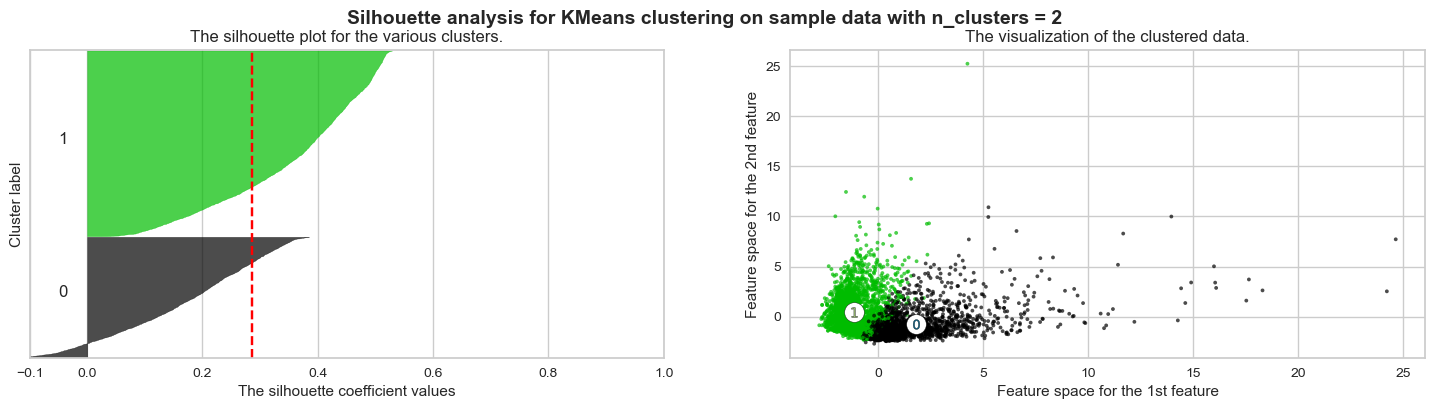

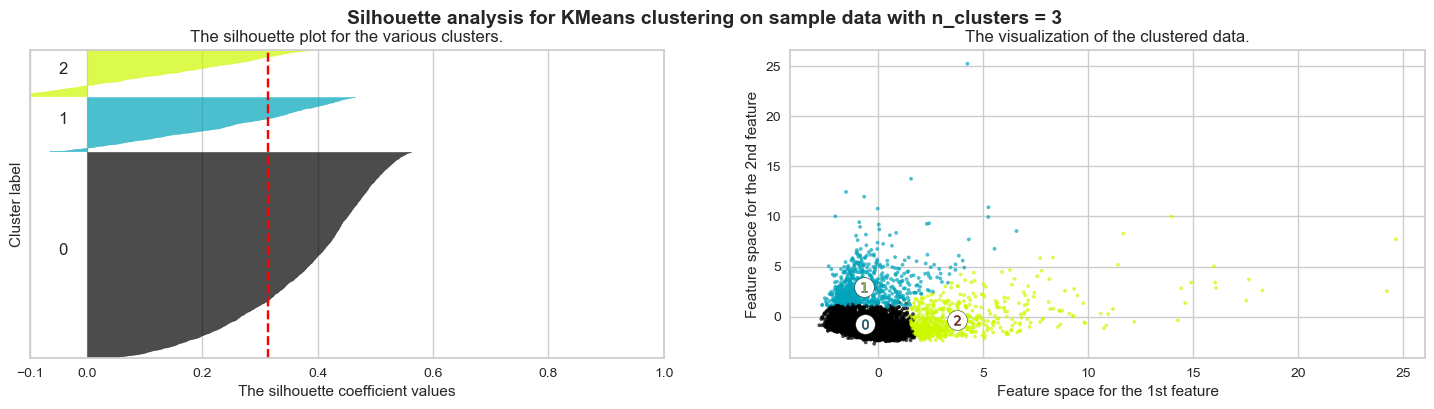

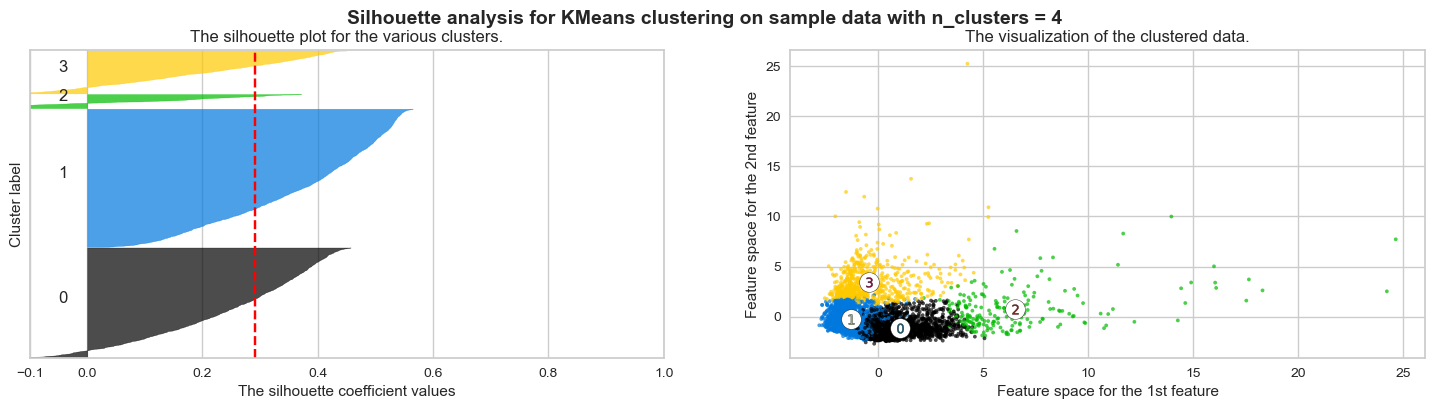

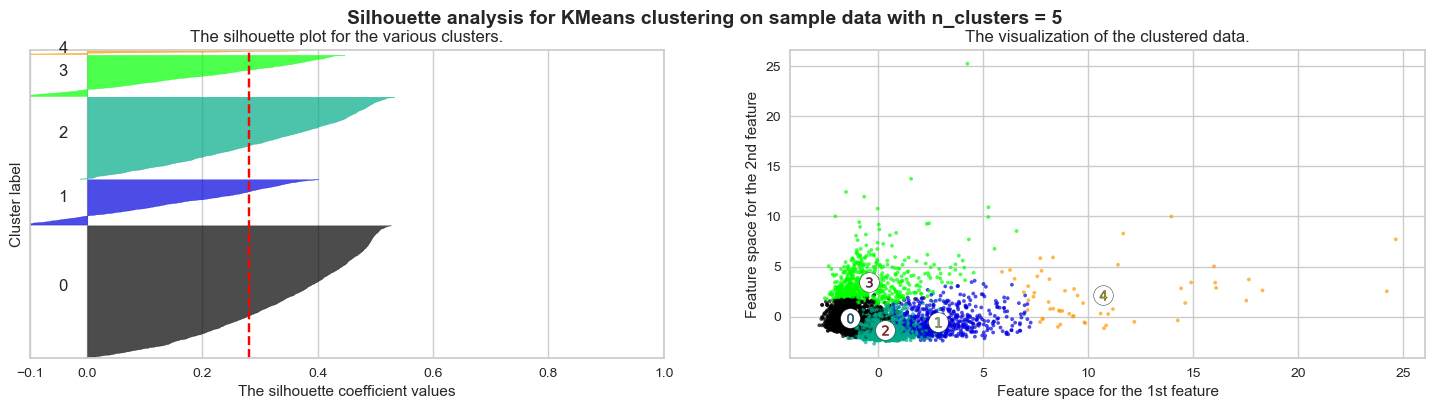

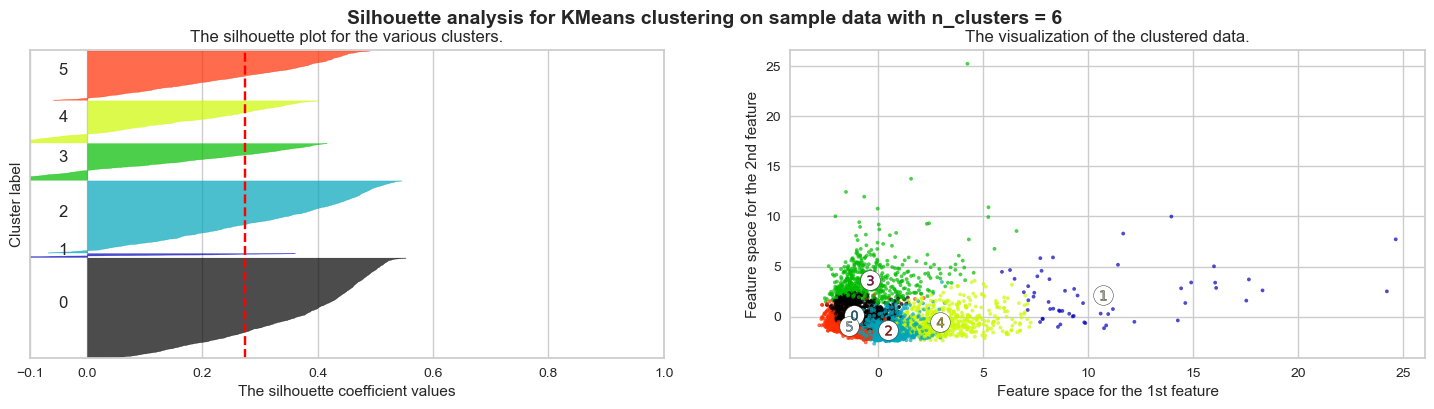

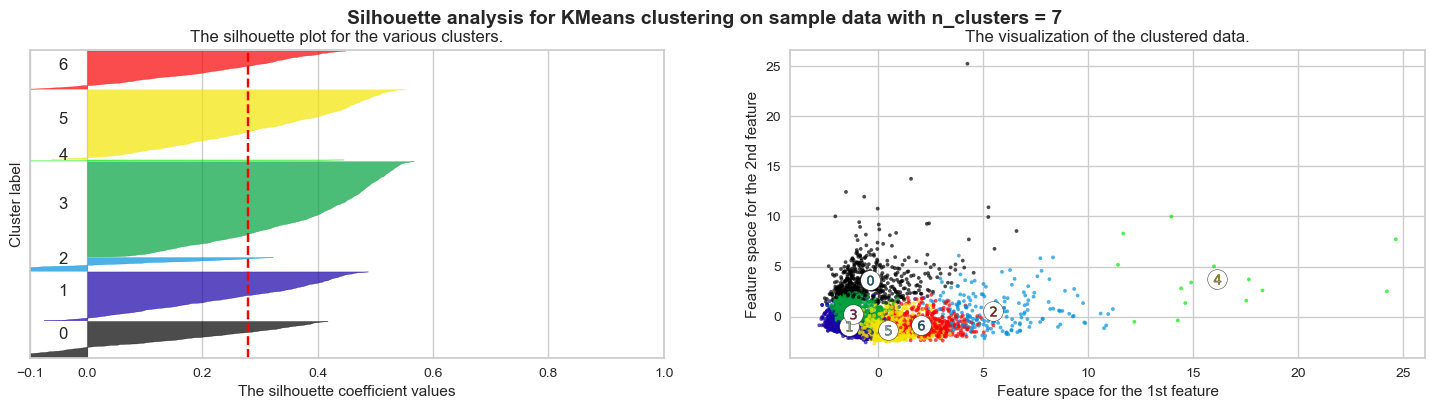

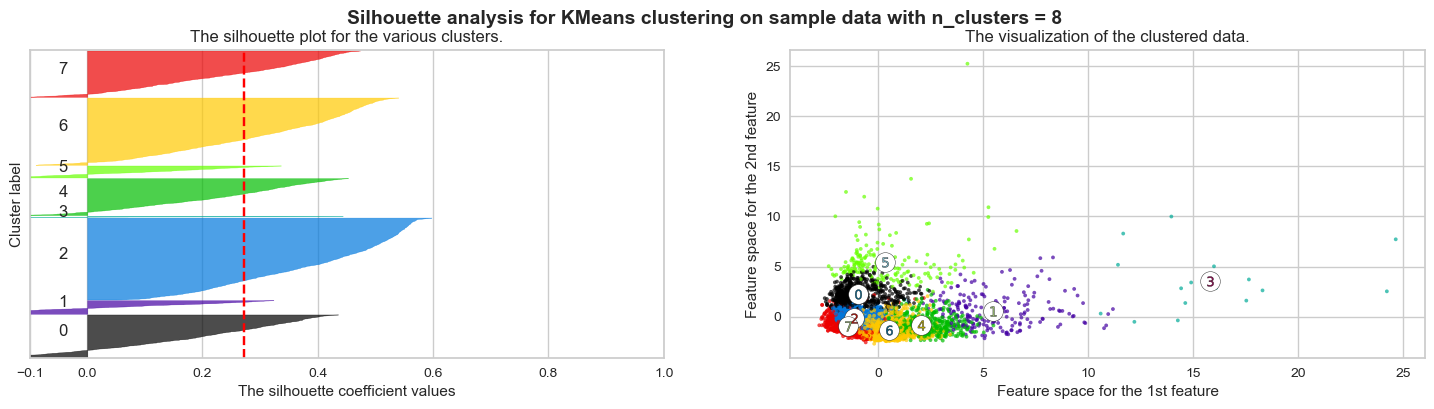

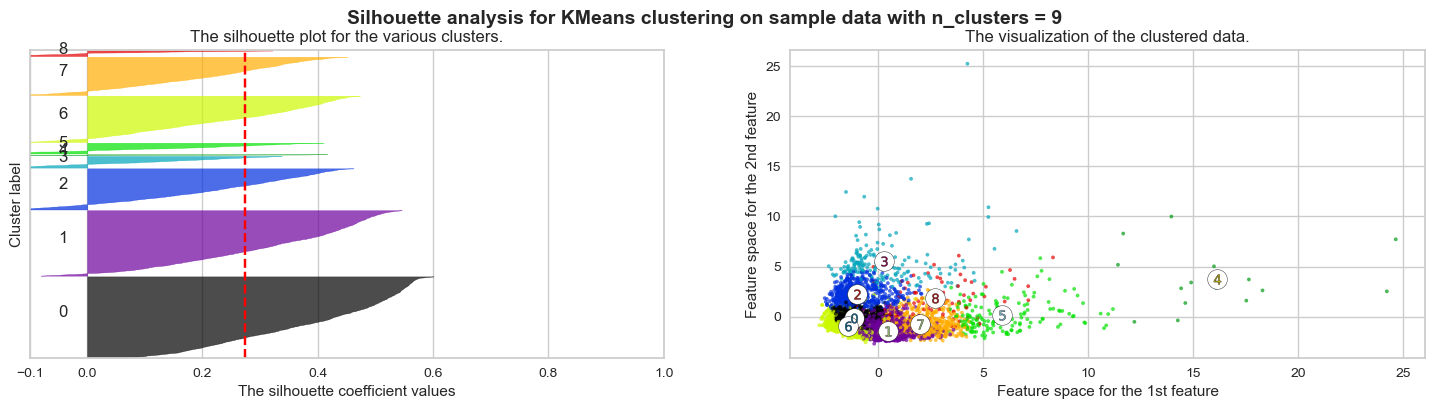

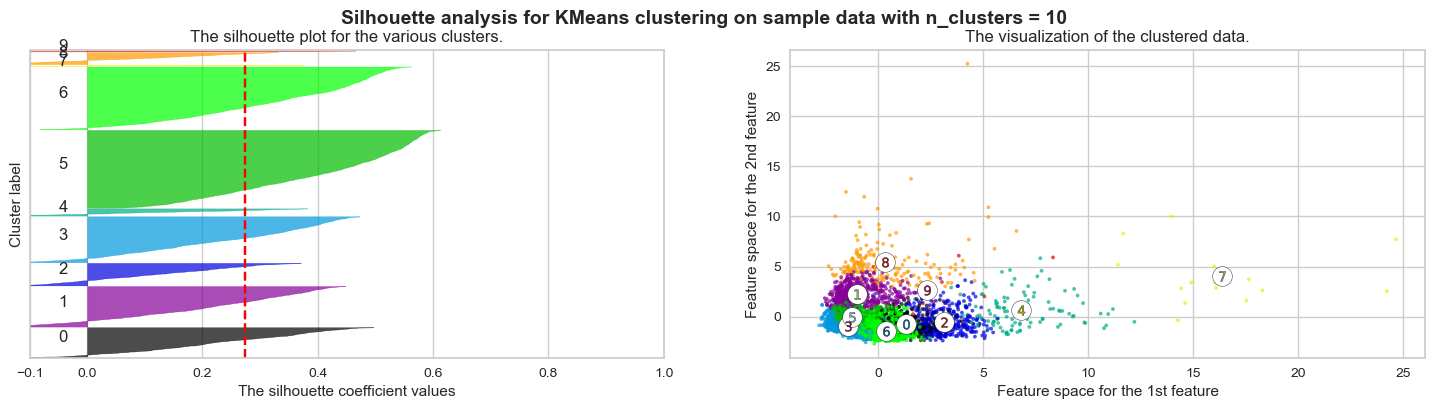

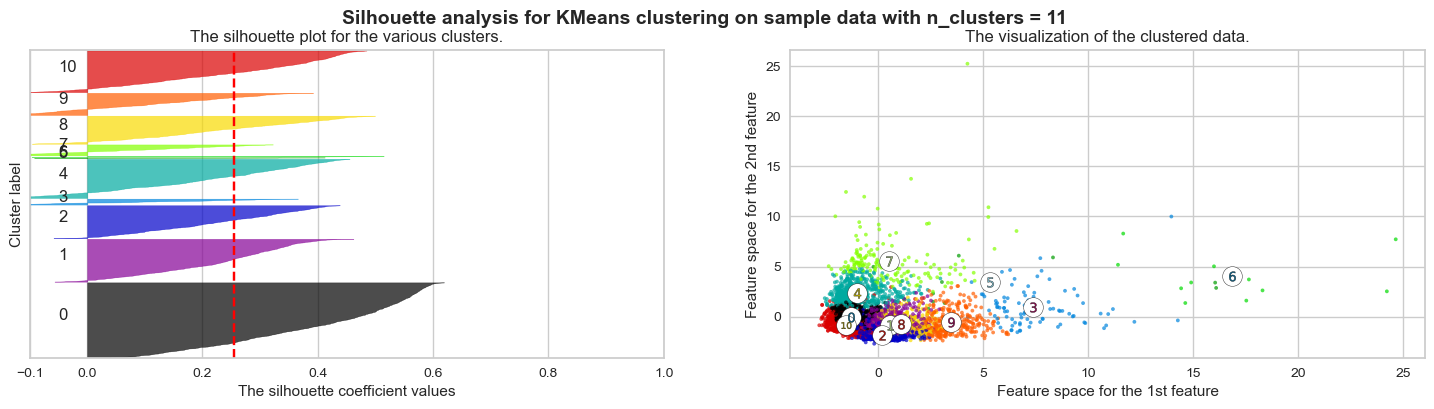

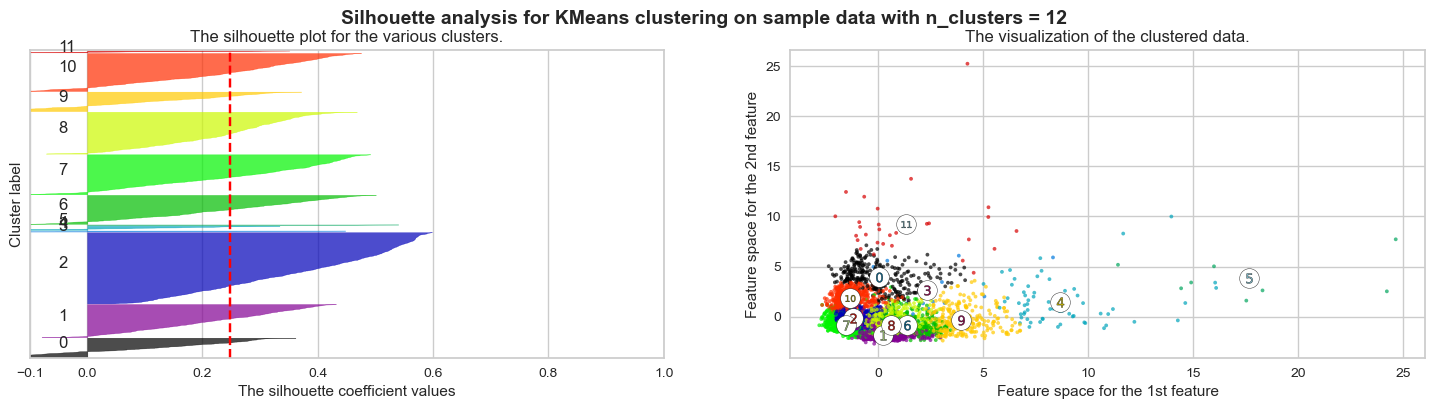

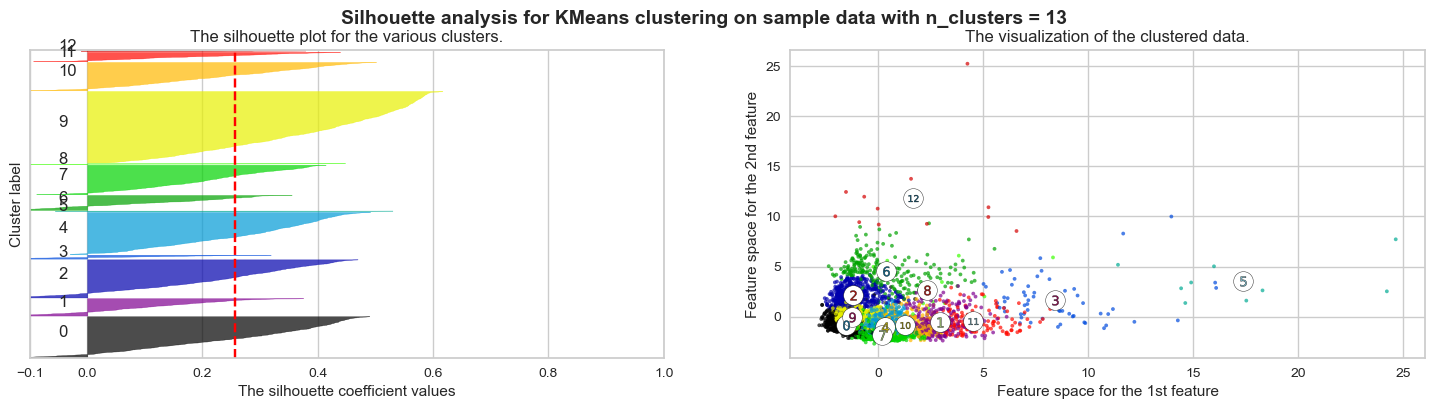

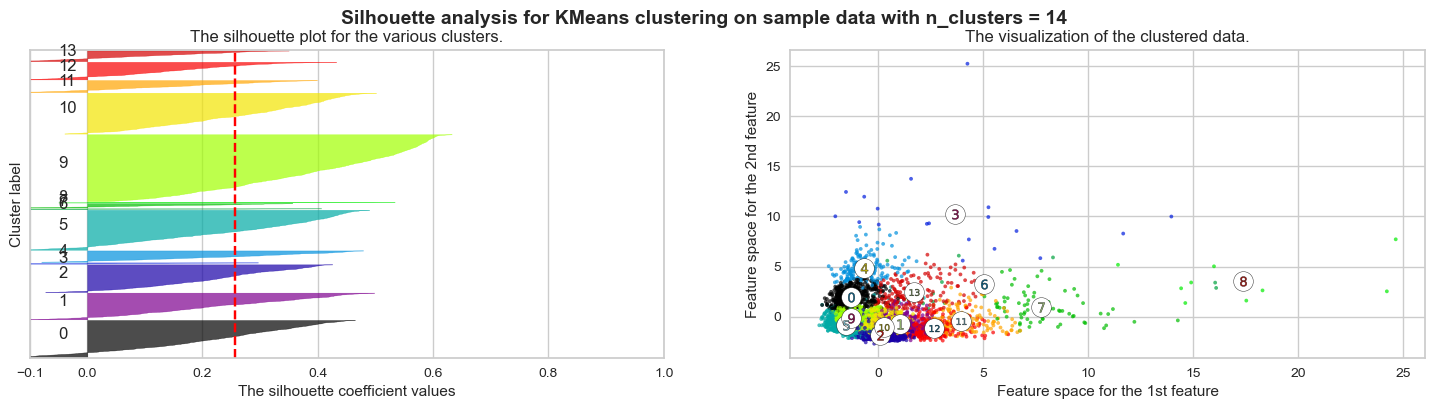

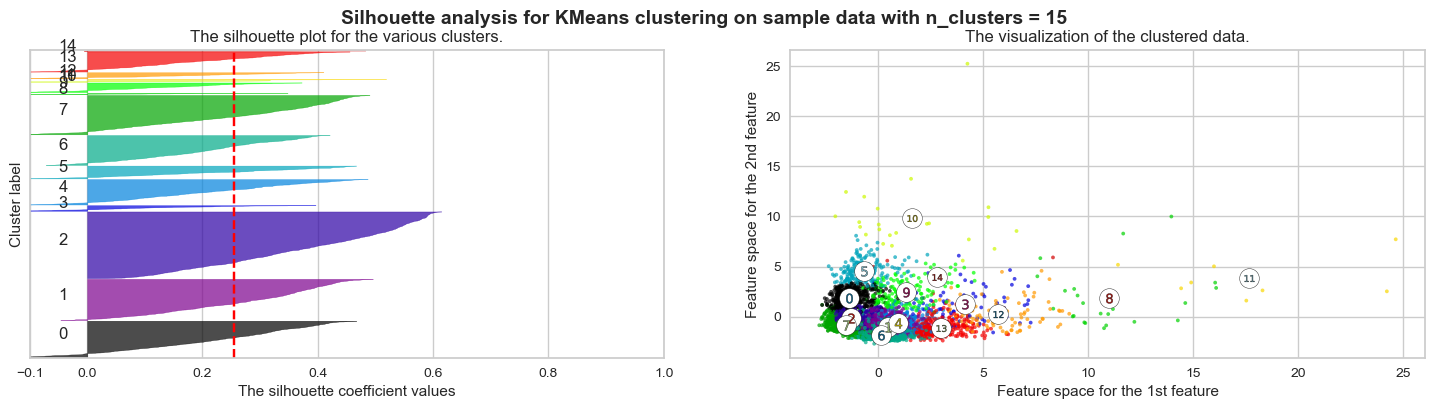

In [59]:
# Function to create Silhouette Plot

def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')
        
# Display the Silhouette Score and Plot Silhouette Plot
plot_silhouette(range(2, max_cluster+1), df_new_scaled_pca, random_state)

Insight : Terlihat pada hasil `average silhouette score`, cluster `terbaik` pada cluster `3 dan 4`. Di sini saya mengambil `cluster 4`, karena memiliki cluster-cluster dengan tingkat `kepadatan` yang relatif `stabil` dan sepadan. Kalau `cluster 3`, saya melihat bahwa masih ada yang `padat sekali` hanya di `satu cluster`. Namun, karena pada perhitungan `elbow method` sebelumnya yaitu `cluster 4` yang terbaik, `subjektif` saya adalah saya `mengambil` dengan angka yang `sama` dengan perhitungan metode lainnya yaitu `elbow`. Mungkin saya akan melihat pula bagaimana gambaran `yellowbrick`-nya. Pada silhouette, digunakan `method function` agar dapat `menampung` seluruh kode grafik menjadi `satu`.

#### 2. Yellowbrick

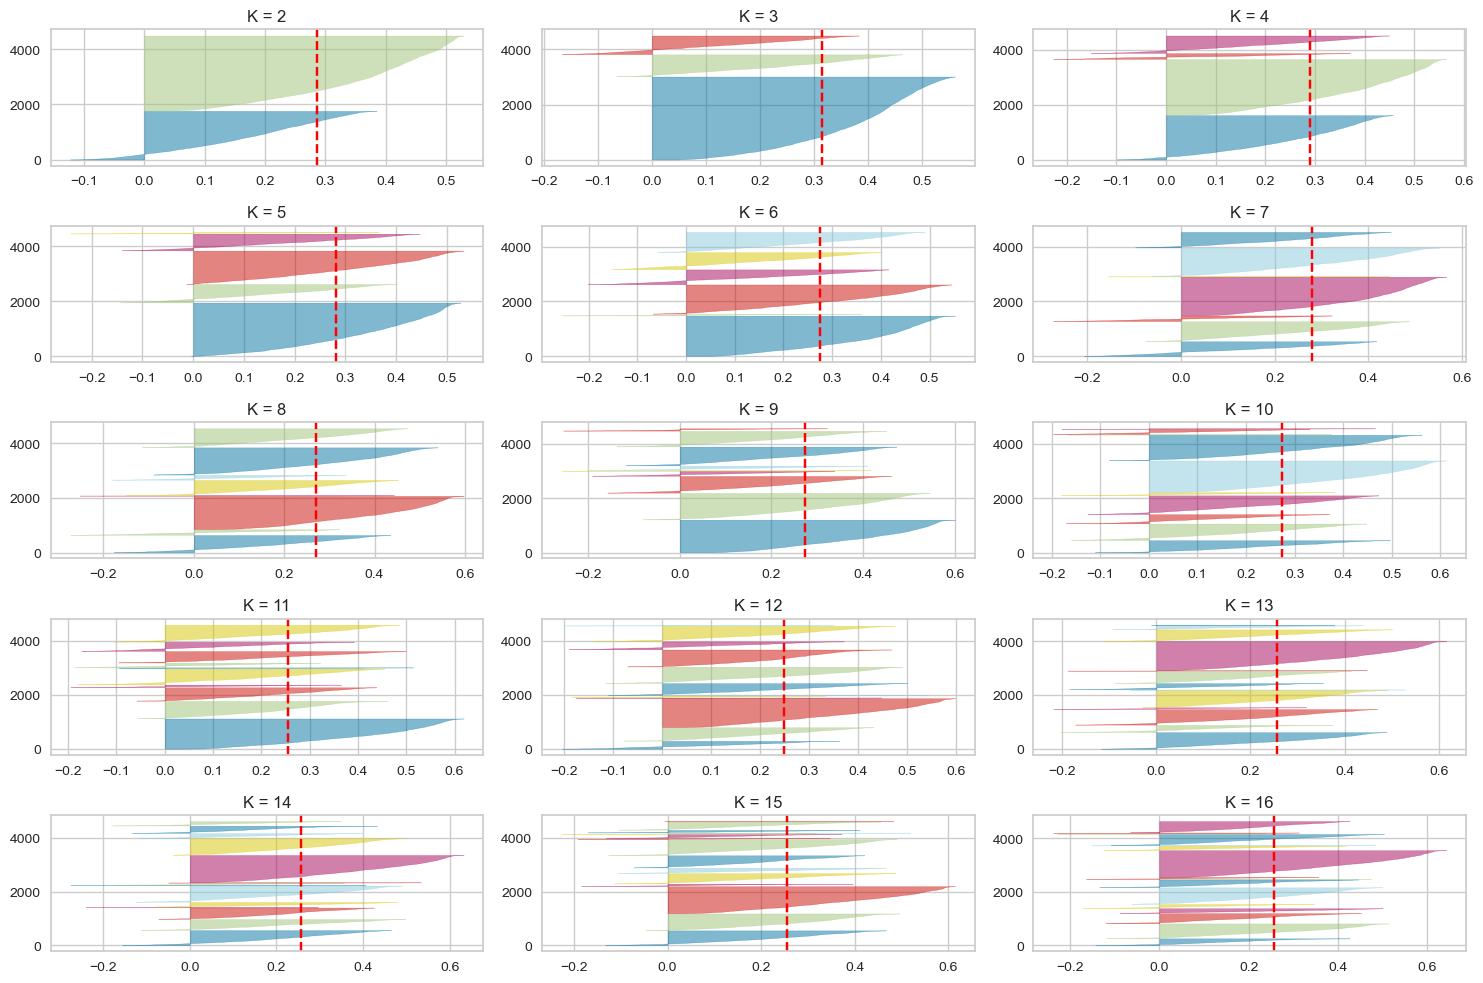

In [60]:
# Display the Silhouette Score and Plot Silhouette Plot

fig, axes = plt.subplots(5, 3, figsize=(15, 10))

# Loop for each plot
for i, ax in enumerate(axes.flatten()):

    # Initialize K-means clustering
    n_clusters = i + 2
    kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)

    # Create SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)

    # Fit visualizer to data
    visualizer.fit(df_new_scaled_pca)

    # Set title
    ax.set_title(f'K = {n_clusters}')

# Adjust layout
plt.tight_layout()
plt.show()

Insight : Pada `yellowbrick` juga terlihat bahwa `cluster 3 dan 4 `terbaik jika dilihat dari kepadatan `cluster` dan juga nilai `koefisien` `silhouette`-nya. Dan saya akan menggunakan `4 cluster` dalam hal ini sesuai dengan penjelasan sebelumnya.

## Find the Optimal Hyperparameters

### -Using min_samples

In [61]:
# Check the value of `min_samples`

min_samples = df_new_scaled_pca.shape[1]+1
print('min_samples : ', min_samples)

min_samples :  6


Insight : Pada umumnya, nilai `minimum sample` setidaknya harus `lebih dari satu` dari nilai `dimensinya`. Maka kemudian, `dataframe` yang telah dilakukan `scaling` dan dilakukan `training` dengan `PCA` untuk `dimensional reduction` tadi `ditambah satu` untuk menentukan `minimum sample`. Maka hasil `minimum sample` nya adalah `6`.

### -NN Algorithm Train

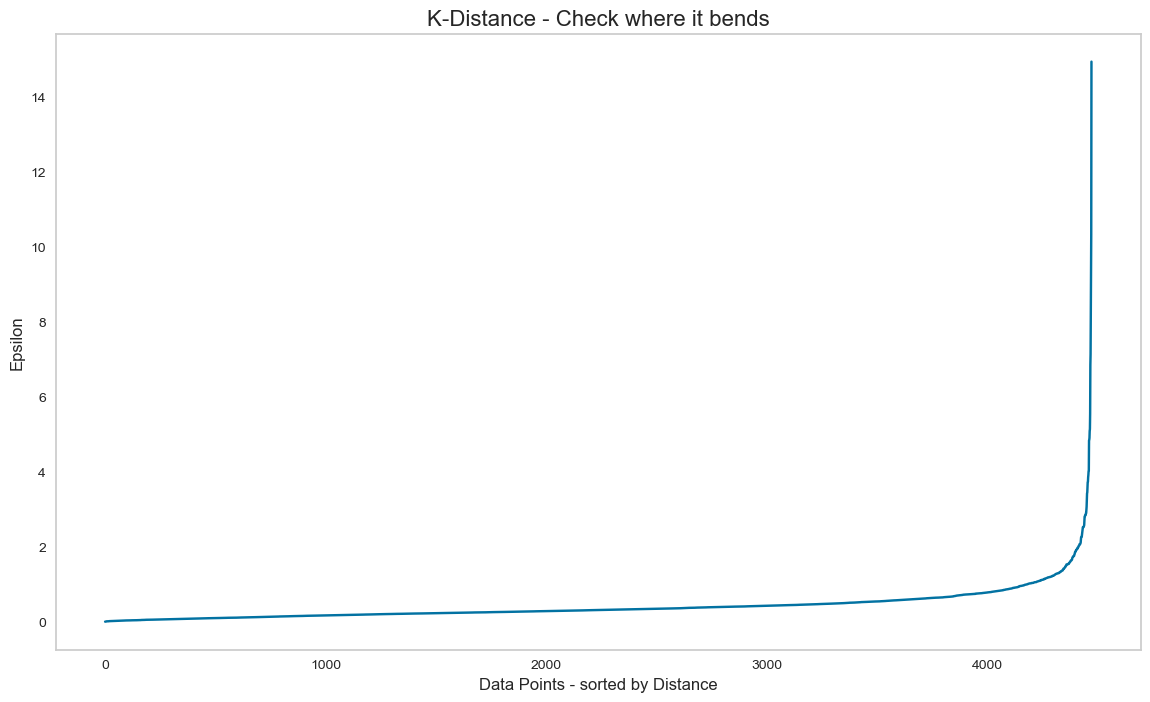

In [62]:
#Let's explore the data and work out a better setting

neigh = NearestNeighbors(n_neighbors=min_samples)
nbrs = neigh.fit(df_new_scaled_pca)
distances, indices = nbrs.kneighbors(df_new_scaled_pca)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(14,8))
plt.grid()
plt.plot(distances)
plt.title('K-Distance - Check where it bends',fontsize=16)
plt.xlabel('Data Points - sorted by Distance',fontsize=12)
plt.ylabel('Epsilon', fontsize=12)
plt.show()

Insight : Pada `plot` yang dihitung menggunakan Nearest Neighbors Algorithm training, terlihat bahwa `epsilon 3 dan 4` memiliki jarak yang makin seimbang atau gampangnya `garis` mulai `menanjak` secara `drastis` pada kedua epsilon tersebut. Maka `kedua epsilon` ini, dijadikan bahan untuk perhitungan `DBSCAN training`.

### -Outliers Checking Visualization by Percentage

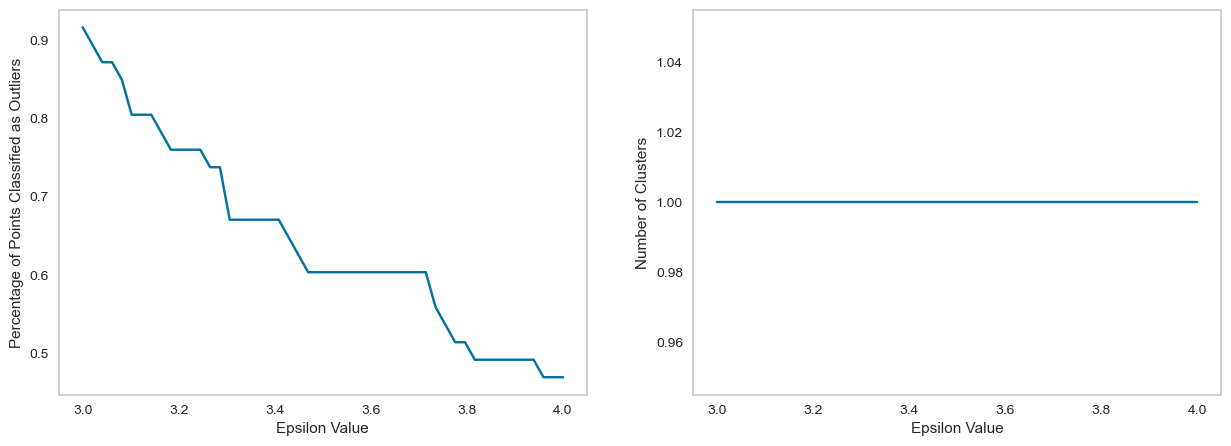

In [63]:
# Let's check the number of outliers with different eps

## Define the `eps`
start_eps = 3
end_eps = 4
number_eps = 50 # Number of `eps` combination to try
outlier_percent = []
clusters_size = []

## Start looping
for eps in np.linspace(start_eps, end_eps, number_eps):

    ## Create Model
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(df_new_scaled_pca)

    ## Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

    ## Get cluster size
    n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)

    outlier_percent.append(perc_outliers)
    clusters_size.append(n_clusters)

## Plot the effect of different epsilons
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(np.linspace(start_eps, end_eps, number_eps), outlier_percent)
plt.xlabel("Epsilon Value")
plt.ylabel("Percentage of Points Classified as Outliers")

plt.subplot(1, 2, 2)
plt.grid()
plt.plot(np.linspace(start_eps, end_eps, number_eps), clusters_size)
plt.xlabel("Epsilon Value")
plt.ylabel("Number of Clusters")

plt.show()

Insight : Untuk perhitungan `DBSCAN training`, menunjukkan bahwa `epsilon value 3-4` cenderung sama. Di sini digunakan `epsilon` `3.8` untuk `meminimalisir outlier`, sehingga `outlier` `kurang` dari `0.5%`.

# **Model Definition**

## K-Means

In [64]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)

Insight : `Mendefiniskan` model `K-Means` menggunakan library `KMeans` dengan `parameter` tertentu yang sudah dilakukan perhitungan sebelumnya terutama pada `cluster`. Di sini digunakan `4 cluster`untuk `pemodelan`.

## DBSCAN

In [65]:
best_dbscan = DBSCAN(eps=3.8, min_samples=min_samples)

Insight : `Mendefiniskan` model `Best DBSCAN` menggunakan library `DBSCAN` dengan `parameter` tertentu yang sudah dilakukan perhitungan sebelumnya terutama pada `epsilon value` yang diambil pada perhitungan DBSCAN sebelumnya. Di sini digunakan `epsilon value sebesar 3.8`untuk `pemodelan`.

# **Model Training**

## Train with the Optimal Number of Clusters

### -K-Means Training

In [66]:
# Train with optimal number of clusters
pred = km.fit_predict(df_new_scaled_pca)
pred

array([1, 1, 1, ..., 1, 1, 3])

Insight : Melakukan `training` model pada `K-Means` menggunakan `fit_predict`. Hasilnya merupakan `index` dari `cluster` dalam bentuk `array` 

### -DBSCAN Training

In [67]:
best_dbscan.fit(df_new_scaled_pca)

DBSCAN(eps=3.8, min_samples=6)

Insight : Melakukan `training` pada `best_dbscan` menggunakan `fit` yang mana parameternya merupakan hasil dari pemilihan `epsilon value` terbaik yang telah dihitung menggunakan `dbscan training` sebelumnya dan `minimum sample` terdapat pada perhitungan `dimensional reduction` ditambah 1.

# **Model Evaluation**

## K-Means Evaluation

#### 1. Create New Column for Cluster

In [68]:
# Insert clustering result into original dataset
df['CLUSTER'] = pred
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,3091,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,NaN,0.0,8,1
1,5069,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,NaN,0.0,8,1
2,6075,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8,1
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8,1
4,7755,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,2345,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11,3
4471,6785,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11,3
4472,7347,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11,1
4473,8447,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11,1


Insight : Membuat kolom baru bernama `CLUSTER` guna melihat pembagian `cluster` pada data dan juga untuk dilakukan `evaluasi` selanjutnya.

#### 2. 2D Visualization CLUSTER

<Axes: >

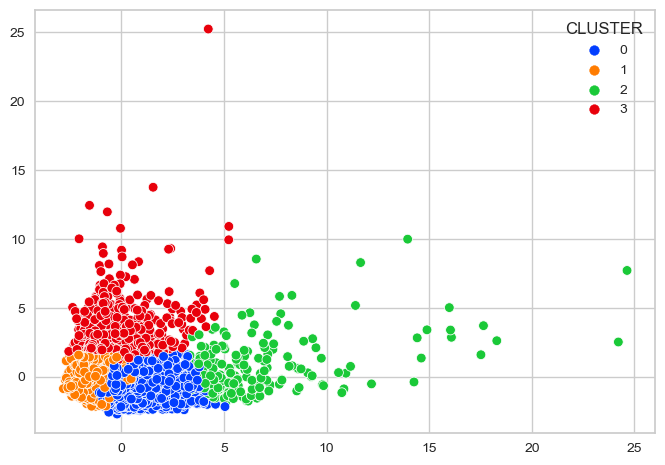

In [69]:
# Cluster visualization in 2D

pca_2d = PCA(n_components=2)
pca_2d.fit(df_new_scaled)

df_new_scaled_pca_2d = pca_2d.fit_transform(df_new_scaled)

sns.scatterplot(x=df_new_scaled_pca_2d[:,0], y=df_new_scaled_pca_2d[:,1], hue=df['CLUSTER'], palette='bright')

Insight : Pemilihan `cluster 4` menurut saya cukup baik dibandingkan yang lainnya, karena `kepadatan` cluster satu cukup `stabil` terhadap cluster yang lainnya. Grafik `scatterplot` dibuat menggunakan library `matplotlib` yang desainnya digunakan `seaborn`. Dan juga dilakukan `fitting` pada `PCA 2 dimensi` menggunakan `komponen 200%`.

## DBSCAN Evaluation

#### 1. Silhouette Score

In [70]:
df['CLUSTER_DBSCAN'] = best_dbscan.labels_

# Check how many clusters are formed
n_clusters = len(set(best_dbscan.labels_)) - (1 if -1 in best_dbscan.labels_ else 0)
print('Number of Clusters : ', n_clusters)

# Check how many data points are considered as outlier
print('Number of Outliers : ', best_dbscan.labels_[best_dbscan.labels_ == -1].size)

# Check Silhouette Score
print('Silhouette Score   : ', silhouette_score(df_new_scaled_pca, best_dbscan.labels_))

Number of Clusters :  1
Number of Outliers :  23
Silhouette Score   :  0.7825253713804983


Insight : Dibuat kolom baru bernama `CLUSTER_DBSCAN`. Didapat `silhouette score` pada evaluasi kolom tersebut adalah `78%`. Artinya sudah `cukup baik` untuk `clustering`-nya, karena di atas `50%`. Untuk `cluster`-nya didaptkan `1` yang terbaik dan `outlier` terdapat `23`.

#### 2. 2D Visualization CLUSTER_DBSCAN

<Axes: >

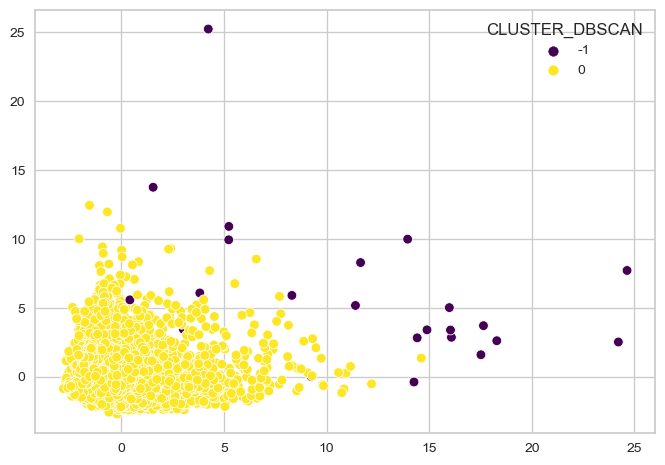

In [71]:
# Cluster visualization in 2D

pca_2d = PCA(n_components=2)
pca_2d.fit(df_new_scaled)

sales_scaled_pca_2d = pca_2d.fit_transform(df_new_scaled)

sns.scatterplot(x=sales_scaled_pca_2d[:,0], y=sales_scaled_pca_2d[:,1], hue=df['CLUSTER_DBSCAN'], palette='viridis')

Insight : Terlihat bahwa `visualisasi` pada kolom `CLUSTER_DBSCAN` menampilkan `cluster` yang sangat padat terdapat di `label 0`. Diprediksi bahwa data baru nanti kemungkinan besar `masuk` label 0. Grafik `scatterplot` dibuat menggunakan library `matplotlib` yang desainnya digunakan `seaborn`. Dan juga dilakukan `fitting` pada `PCA 2 dimensi` menggunakan `komponen 200%`.

# **Model Saving**

In [72]:
with open('scaler.pkl','wb') as fl1:
  pkl.dump(scaler, fl1)
with open('pca.pkl','wb') as fl2:
  pkl.dump(pca, fl2)
with open('kmeans.pkl','wb') as fl3:
  pkl.dump(km, fl3)
with open('dbscan.pkl','wb') as fl4:
  pkl.dump(dbscan, fl4)
with open('best_dbscan.pkl','wb') as fl5:
  pkl.dump(best_dbscan, fl5)

Insight : Melakukan penyimpanan pada seluruh `model` menggunakan library `pickle` dengan fungsi `dump`.

# **Model Inference**

`On notebook : P1G6_Set_1_amri-hakim_inf.ipynb`

# **Pengambilan Kesimpulan**

<div style="text-align:justify;">
&emsp; Pada unsupervised learning, label harus dilakukan prediksi, karena sejatinya unsupervised learning tidak memiliki label. Cara melakukan prediksinya bisa digunakan berbagai algoritma yaitu K-Means dan DBSCAN. Pada kasus ini, tidak menggunakan algoritma K-Prototype dikarenakan dataset tidak memiliki kategori. Sebelum melakukan prediksi, terlebih dahulu melakukan dimensional reduction menggunakan PCA agar dataset yang memiliki fitur yang banyak, dapat direduksi atau dilakukan transformasi menjadi hanya beberapa saja. Jadi, misal ada 40 fitur, ternyata setelah direduksi hanya terdapat 10 fitur. 10 fitur hasil reduksi ini didalamnya mencakup atau mewakili 40 fitur tersebut. Maka kemudian, setelah dilakukan dimensional reduction, data di scaling dan dilakukan pemodelan menggunakan algoritma K-Means untuk mengelompokkan data ke dalam cluster dan juga algoritma DBSCAN untuk melihat titik kepadatan data pada cluster. Intinya, unsupervised learning bertujuan agar data-data yang tidak memliki label, dapat ditemukan polanya.</div>

# **Conceptual Problems**

## 1. Apakah yang dimaksud dengan `inertia` pada algoritma K-Means ?

<div style="text-align:justify;">
&emsp; Inertia pada algoritma K-Means merupakan jumlah kuadrat jarak sampai ke pusat cluster terdekat. Maka, ketika inertia mulai mengalami pelambatan pada penurunan, dapat dikatakan merupakan cluster terbaik. Pada kasus ini, elbow method menganalisis metrik WCSS atau inertia mana yang terlihat mulai mengalami penurunan yang rendah. Di grafik, cluster 2 dan 3 masih memiliki nilai inertia yang tinggi. Pada cluster 4, sudah mulai mengalami perubahan nilai inertia yang rendah. Itu artinya, cluster 4 dapat dijadikan rujukan cluster terbaik atau terpadat pada algoritma K-Means.</div>

## 2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !

<div style="text-align:justify;">
&emsp; Elbow method sangat berguna untuk mencari siku (elbow point) pada grafik yang artinya titik siku tersebut merupakan cluster terbaik. Kemudian juga dianalisis nilai inertia atau WCSS untuk dapat memastikan bahwa siku merupakan cluster terbaik. Jadi, terbentuknya siku adalah karena nilai inertia sudah mulai mengalami pelambatan pada penurunan. Itulah merupakan penggunaan dan kelebihan pada elbow method yaitu dapat mencari cluster terbaik. Untuk kelemahannya sendiri, elbow method ini cenderung subjektif. Jadi, tidak selalu mendefinisikan cluster terbaik. Maka perlu digunakan metode lain untuk benar-benar dapat dianalisa secara konkret terkait pencarian cluster terbaik, salah satunya menggunakan silhouette.</div>